In [6]:
from VentSimulator.VolumeVentilator import VolumeVentilator
import matplotlib.pyplot as plt
%matplotlib inline
vent = VolumeVentilator()
vent.simulate(3) ## Simulate a 6 second period

# Volume Targeted Ventilation
We are going to start by modeling volume targeted ventilation. In volume control, we set:
* The tidal volume
* Either the amount of time that tidal volume is delivered (inspiratory time) or the inspiratory flow.
* The pattern of the flow (i.e. is the flow constant or does it change over the respiratory cycle?)

## Inspiration

Let's start by drawing the waveforms that we would expect to see on the ventilator for the following settings:
* Tidal Volume 500mL
* Flow 1L/second (or 60L/min)
* Constant flow
* PEEP of zero
Our patient has the following properties:
* Compliance 50mL/cmH20
* Resistance $10 \frac{\text{cmH}_2\text{0}}{L \times \text{Second}^-1}$

We will focus on the inspiratory portion of the curves only for now. Go ahead and draw the flow-time curve. When you're ready to see the answer, press run on the cell below.

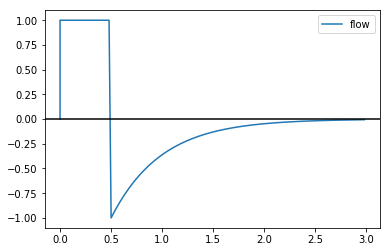

In [7]:
vent.plot('flow')

Does your graph look like the one above? It should have:
- constant flow (1L/second)
- A 0.5s inspiratory cycle (0.5L / (1L/second))

Now lets draw the curve for volume-time. Remember that flow is the rate of change in volume (and we have constant flow). When you're ready, press run on the cell below.

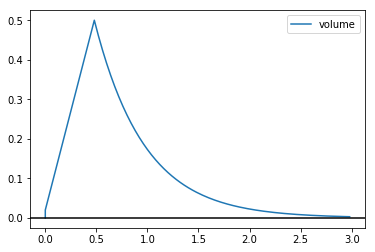

In [8]:
vent.plot('volume')

Does your graph look like the one above? It should have:
- A constant slope from zero volume to 0.5L over 0.5s

Alright,now all we have left is the pressure-time curve. Start by writing out the equation of motion:
$$P = \dot V R + \frac{V}{C} + \text{PEEP}$$

Our ventilator doesn't show the alveolar pressure-time curve but we can draw it based on the volume-time curve. Remember that we are considering compliance a constant and the PEEP is zero so the relationship. What is the relationship between alveolar pressure and alveolar volume? (Hint: think about the defintion of compliance). The curves have the same shape! One is just a scaled version of the other!

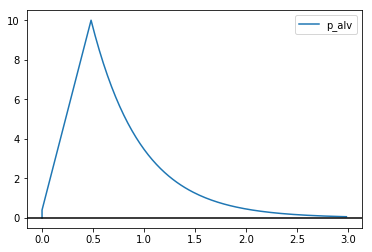

In [12]:
vent.plot('p_alv')

So the only terms left in the equation of motion is $\dot VR$. We already said that flow is a constant (and R is a property of the patient). So the airway pressure-time curve is just the alveolar pressure-time curve with a constant term added:

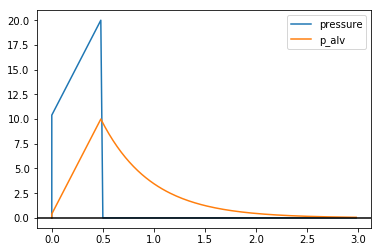

In [13]:
vent.plot(['pressure', 'p_alv'])

Now, lets do expiration

## Expiration

Expiration is a little more complex. At the very start of exhalation:
- What is the alveolar pressure? (Hint: This has to be the same as the alveolar pressure at end-inhalation)
- What is the airway pressure? (Hint: we set this on the ventilator)
- What is the $\Delta P$?

Again, lets start with the simplest graph. Lets draw the pressure-time curve.

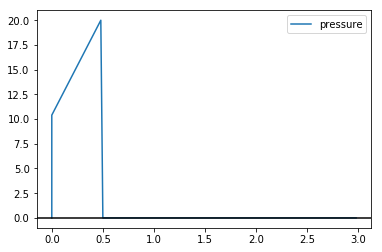

In [14]:
vent.plot(['pressure'])

That's right, when the ventilator cycles to exhalation the airway pressure is equal to PEEP. Now lets consider the flow-time curves. First, lets rearrange the equation of motion so that flow is by itself:

$$\begin{eqnarray} 
    \text{P} & = & \dot V R + \frac{V}{C} + \text{PEEP}\\
    \text{P} - \frac{V}{C} + \text{PEEP} & = & \dot V R \\
    \dot V R & = & -\frac{V}{C} \\
    \dot V & = & -\frac{\frac{V}{C}}{R}
\end{eqnarray}$$
Note by convention, expiratory flow is negative.

This expression has some interesting elements. First the rate of change of volume (i.e. flow) is proportional to the volume. This is the [natural (or exponential) decay equation](https://en.wikipedia.org/wiki/Exponential_decay) and the solution has the form:
$$ V(t) = V_0 \frac{1}{e^{\frac{t}{RC}}} $$

Through some crazy math, the equation for flow **has the same form**:
$$ \dot V(t) = \dot V_0 \frac{1}{e^{\frac{t}{RC}}} $$

We call $RC$ the time-constant. Sometimes we also all it $\tau$ to be confusing. Let's consider a couple of interesting time points during exhalation. 

At time $t=0$, then $\frac{0}{\tau} = 0$ and $e^0 = 1$. This is good because it implies that $V(0) = V_0 \frac{1}{1}$ and $\dot V(0) = \dot V_0 \frac{1}{1}$. Alternatively we can say that at the very begining of exhalation: a) the remaining volume equals the inhaled volume b) the expiratory flow is at it's peak

At time $t = RC$, then $\frac{RC}{\tau} = 1$ and $e^1 = e = 2.67$ or so. Thus after $RC$ seconds, the remaining volume is $\frac{1}{e}$ or about 36.7% of the starting volume. The expiratory flow is also 36.7% of the peak expiratory flow. 

At time $t = 2RC$, then $\frac{2RC}{\tau} = 2$ and $e^2 = 7.39$ or so. Thus after $2RC$ seconds, the remaining volume is $\frac{1}{e^2}$ or about 13.5% of the starting volume. The expiratory flow is also 13.5% of the peak expiratory flow. 

I've done the math for the first 7 time constants below:

| Time Constant |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  | 
| ------------- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Precentage Remaining | 100.00% | 36.79% |13.53% |4.98% | 1.83% |0.67% |0.25% |0.09% | 0.03% |

Go ahead and draw the Flow-Time and Volume-Time curves.

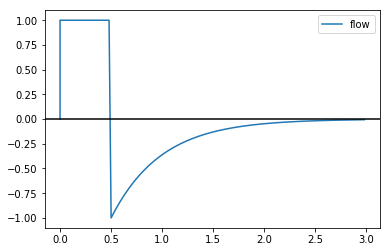

In [17]:
vent.plot('flow')

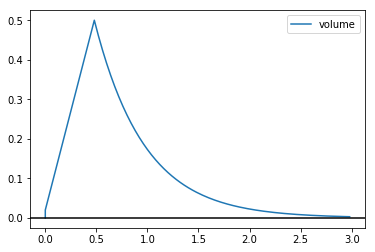

In [16]:
vent.plot('volume')